<a href="https://colab.research.google.com/github/tigranvartanyan/popytka1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled16_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [75]:
import pandas as pd

In [76]:
%cd gdrive/MyDrive/

[Errno 2] No such file or directory: 'gdrive/MyDrive/'
/content/gdrive/MyDrive


In [77]:
import numpy as np

In [78]:
import seaborn as sns

In [79]:
import matplotlib.pyplot as plt

In [80]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [81]:
from sklearn.decomposition import PCA

In [82]:
from sklearn.metrics import mean_squared_error

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

In [ ]:
!pip install scikit-learn -U

In [ ]:
!pip install category_encoders

Набор данных состоит из множества записей, каждая из которых включает объективные характеристики произведенной шоколадной плитки и оценку ее качества, выставленную экспертом. Модель должна предсказывать экспертную оценку на основе имеющихся объективных данных.

In [85]:
B = pd.read_csv('flavors_of_cacao.csv')

In [86]:
B

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [87]:
B.shape

(1795, 9)

Набор данных состоит из 9 различных категориальных и непрерывных праметров 1795 шоколадных плиток

In [88]:
B.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [89]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [90]:
B.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

**target: Rating**

Numerical **columns**

In [91]:
num_cols = B.select_dtypes(exclude='object')
num_cols.shape

(1795, 3)

In [92]:
num_cols.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


Подготовка данных

Номер экспертной записи ('REF') не имеет отношения к качеству шоколада и будет исключен  из дальнейшего анализа

In [93]:
B.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [94]:
B['Rating'].describe()

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64

In [95]:
B.size

16155

In [96]:
BRating = B['Rating']
BRating

0       3.75
1       2.75
2       3.00
3       3.50
4       3.50
        ... 
1790    3.75
1791    3.00
1792    3.50
1793    3.25
1794    3.00
Name: Rating, Length: 1795, dtype: float64

In [97]:
BRating.max()

5.0

In [98]:
BRating.min()

1.0

In [99]:
BRating.mean()

3.185933147632312

Это среднее значение будет использовано для константного предсказания и определения его погрешности

In [100]:
BCoca = B['Cocoa\nPercent']
BCoca

0       63%
1       70%
2       70%
3       70%
4       70%
       ... 
1790    70%
1791    65%
1792    65%
1793    62%
1794    65%
Name: Cocoa\nPercent, Length: 1795, dtype: object

In [101]:
B['Cocoa\nPercent'].value_counts()

70%      672
75%      222
72%      189
65%       78
80%       72
74%       50
68%       47
60%       43
73%       40
85%       36
64%       34
77%       33
71%       31
67%       27
76%       23
66%       23
100%      20
82%       17
78%       17
55%       16
62%       14
63%       12
69%       10
90%        8
61%        8
88%        8
58%        8
81%        5
83%        4
84%        4
72.5%      4
91%        3
56%        2
73.5%      2
99%        2
89%        2
53%        1
46%        1
60.5%      1
57%        1
79%        1
86%        1
50%        1
42%        1
87%        1
Name: Cocoa\nPercent, dtype: int64

**Cacao data visualization**

In [ ]:
B['Cocoa\nPercent'].value_counts().plot(kind='pie')

Данные в столбце Cocoa\nPercent представляются  важными, однако их нельзя непосредственно использовать как числовые, так как из-за наличия знака процента "%", непосредственно примыкающего к цифрам, они воспринимаются как строковые (object). Следующие манипуляции позволяют преобразовать их во float для дальнейшей работы. Будет подготовлен одномерный массив DD нужной длины (заполнен нулями с плавающей запятой), а потом на их место будут поставлены цифры из записи, содержащей цифры и знак процента. После удаления знакак процента строку преобразуем в числовую переменную.

In [103]:
DD = np.zeros(1795)

In [104]:
for i in range(1795):
  DD[i] = float(BCoca[i].replace('%', ''))

In [105]:
DD

array([63., 70., 70., ..., 65., 62., 65.])

In [106]:
type(DD[6])

numpy.float64

Теперь это числа, с которыми можно будет работать. Из очищенных данных составляем рабочий массив 'BB'.

In [107]:
BB = pd.DataFrame({
    "Origin": B['Specific Bean Origin\nor Bar Name'],
    "Percent": pd.Series(DD),
    "Location": B['Company\nLocation'],
    "Year": B['Review\nDate'],
    "Rating":B['Rating']
})

In [ ]:
BB['Percent'].value_counts()

In [109]:
BB

,Origin,Percent,Location,Year,Rating
0,Agua Grande,63.0,France,2016,3.75
1,Kpime,70.0,France,2015,2.75
2,Atsane,70.0,France,2015,3.00
3,Akata,70.0,France,2015,3.50
4,Quilla,70.0,France,2015,3.50
...,...,...,...,...,...
1790,Peru,70.0,Austria,2011,3.75
1791,Congo,65.0,Austria,2011,3.00
1792,Kerala State,65.0,Austria,2011,3.50
1793,Kerala State,62.0,Austria,2011,3.25


In [ ]:
BB['Rating'].value_counts()

In [ ]:
BB['Year'].describe()

**Визуализации**

In [ ]:
BB['Location'].value_counts().plot(kind='pie');

In [ ]:
BB['Percent'].value_counts().plot(kind='pie');

In [ ]:
BB['Rating'].value_counts().plot(kind='pie')

In [ ]:
BB['Rating'].plot.hist()

In [116]:
B['Rating'].mean(0)

3.185933147632312

In [ ]:
BB['Percent'].plot.hist()

**Distibutions of num features**

In [ ]:
sns.displot(BB['Rating'], bins=16, color='r')

In [ ]:
sns.displot(BB['Percent'], bins=40, color='b')

In [ ]:
sns.displot(BB['Year'], bins=11, color='g')

**Scatterplots with target**

In [ ]:
BB.plot("Percent", "Rating", kind="scatter")

Четкой корреляции между процентом содержания какао и оценкой качества шоколада экспертами нет. Большая часть плиток содержит от 50 до 90 процентов какао. Также можно отметить, что высшую оценку 5 и низшую
1 получили небольшое число плиток. Роль информации, содержащейся в категориальных переменных - месте выращивания какое-бобов и месте производства шоколадных плиток - пока неясна.  

Образуем массив 'BBB' из двух признаков - процентного содержания какао и года

In [122]:
BBB = pd.DataFrame({
    "Percent": pd.Series(DD),
    "Year": B['Review\nDate']})

In [ ]:
BBB

In [124]:
BBB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Percent  1795 non-null   float64
 1   Year     1795 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 28.2 KB


Разобьем данные на тренировочные и тестовые

In [125]:
X_train, X_test, y_train, y_test = train_test_split(BBB, BB['Rating'], random_state=1953, test_size=0.3)

In [126]:
X_train.head()

,Percent,Year
434,73.5,2010
455,72.0,2010
1072,72.0,2012
1692,65.0,2007
1471,67.0,2014


Поскольку целевая переменная является числовой характеристикой, в качестве **метрики** естественно выбрать среднеквадратичное отклонение предсказаний целевой переменной от действительной оценки, выставленной экспертами. Предусматривать иные особые штрафы за отклонение в большую или меньшую сторону представляется нецелесообразным, так как занижение оценки также нежелательно, как и завышение.

Сначала посмотри, что дает **константное** предсказание

In [127]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_preds_dummy = dummy.predict(X_test)

In [128]:
mean_squared_error(y_test, y_preds_dummy)

0.23328244483379207

Теперь используем **линейную регрессию**

In [129]:
lr = LinearRegression()

In [130]:
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

In [131]:
mean_squared_error(y_test, y_preds_lr)

0.2229464025063182

In [132]:
reg = lr.fit(X_train, y_train)
reg.coef_

array([-0.01276689,  0.01481186])

Линейная регрессия дала некоторое снижение ошибки по сравнению с константой 0.22 против 0.23, но недостаточное.  

Графики, показывающие ошибки константы и линейной регрессии

In [ ]:
plt.plot(y_test, y_preds_dummy, 'bs', y_test, y_test, 'r')
plt.xlabel('true rating')
plt.ylabel('dummy prediction')
plt.text(3, 4.5, r' red line show the true values')
plt.text(1.5, 3.7, r'            blue squares show')
plt.text(1.5, 3.5, r'the dummy predictions')

In [ ]:
plt.plot(y_test, y_preds_lr, 'bs', y_test, y_test, 'r')
plt.xlabel('true rating')
plt.ylabel('linear regression prediction')
plt.text(3, 4.5, r' red line show the true values')
plt.text(1.5, 3.7, r'            blue squares show')
plt.text(1.5, 3.5, r'the linear regression predictions')

То же самое в одной рамке

In [ ]:
plt.figure()
plt.subplot(211)
plt.plot(y_test, y_preds_dummy, 'bs', y_test, y_test, 'r')
plt.xlabel('true rating')
plt.ylabel('dummy prediction')
plt.text(3, 4.5, r' red line show the true values')
plt.text(1.5, 3.7, r'            blue squares show')
plt.text(1.5, 3.5, r'the dummy predictions')

plt.subplot(212)
plt.plot(y_test, y_preds_lr, 'bs', y_test, y_test, 'r')
plt.xlabel('true rating')
plt.ylabel('linear regression prediction')
plt.text(3, 4.5, r' red line show the true values')
plt.text(1.5, 3.7, r'            blue squares show')
plt.text(1.5, 3.5, r'the linear regression predictions')

Надо использовать данные в категориальных столбцах Origin и Location

In [136]:
from sklearn.preprocessing import LabelEncoder

In [139]:
import category_encoders as ce

In [146]:
BB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Origin    1795 non-null   object 
 1   Percent   1795 non-null   float64
 2   Location  1795 non-null   object 
 3   Year      1795 non-null   int64  
 4   Rating    1795 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 70.2+ KB


In [147]:
encoder = ce.BinaryEncoder()
encoder.fit(BB['Origin'])

BinaryEncoder(cols=['Origin'],
              mapping=[{'col': 'Origin',
                        'mapping':        Origin_0  Origin_1  Origin_2  Origin_3  Origin_4  Origin_5  Origin_6  \
 1            0         0         0         0         0         0         0   
 2            0         0         0         0         0         0         0   
 3            0         0         0         0         0         0         0   
 4            0         0         0         0         0         0         0   
 5            0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
 1037         1         0         0         0         0         0         0   
 1038         1         0         0         0         0         0         0   
 1039         1         0         0         0         0         0         0   
-1            0         0         0         0         0         0         0   
-2            0         0         0         0         0         0         0   

       Origin_7  Origin_8  Origin_9  Origin_10  
 1            0         0         0          1  
 2            0         0         1          0  
 3            0         0         1          1  
 4            0         1         0          0  
 5            0         1         0          1  
...         ...       ...       ...        ...  
 1037         1         1         0          1  
 1038         1         1         1          0  
 1039         1         1         1          1  
-1            0         0         0          0  
-2            0         0         0          0  

[1041 rows x 11 columns]}])

In [148]:
encoder.get_feature_names_out()

array(['Origin_0', 'Origin_1', 'Origin_2', 'Origin_3', 'Origin_4',
       'Origin_5', 'Origin_6', 'Origin_7', 'Origin_8', 'Origin_9',
       'Origin_10'], dtype=object)

In [150]:
Ori = encoder.transform(BB['Origin'])

In [151]:
Ori

,Origin_0,Origin_1,Origin_2,Origin_3,Origin_4,Origin_5,Origin_6,Origin_7,Origin_8,Origin_9,Origin_10
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1790,0,0,0,0,0,0,1,0,1,1,0
1791,0,0,0,0,1,1,0,0,1,0,1
1792,1,0,0,0,0,0,0,1,1,1,0
1793,1,0,0,0,0,0,0,1,1,1,0


In [ ]:
BBB = pd.DataFrame({
    "Percent": pd.Series(DD),
    "Year": B['Review\nDate']})

Образуем массив 'B4' объединив массив 'BBB', в котором было два числовых признака,  с массивом 'Ori', в котором закодировано место выращтвания какао бобов

In [ ]:
B4 = BBB.join(Ori)
B4

In [155]:
X1_train, X1_test, y1_train, y1_test = train_test_split(B4, BB['Rating'], random_state=1953, test_size=0.3)

In [157]:
lr.fit(X1_train, y1_train)
y1_preds_lr = lr.predict(X1_test)

In [158]:
mean_squared_error(y1_test, y1_preds_lr)

0.22652322842640493

In [159]:
reg1 = lr.fit(X1_train, y1_train)
reg1.coef_

array([-0.01322834,  0.0146748 ,  0.00369032,  0.05212928, -0.00492714,
       -0.02738561, -0.0377308 , -0.02646395, -0.00078777, -0.03591094,
       -0.03358843,  0.00720175,  0.00899411])

In [160]:
encoder.fit(BB['Location'])

BinaryEncoder(cols=['Location'],
              mapping=[{'col': 'Location',
                        'mapping':      Location_0  Location_1  Location_2  Location_3  Location_4  Location_5
 1            0           0           0           0           0           1
 2            0           0           0           0           1           0
 3            0           0           0           0           1           1
 4            0           0           0           1           0           0
 5            0           0           0           1           0           1
..          ...         ...         ...         ...         ...         ...
 58           1           1           1           0           1           0
 59           1           1           1           0           1           1
 60           1           1           1           1           0           0
-1            0           0           0           0           0           0
-2            0           0           0           0           0           0

[62 rows x 6 columns]}])

In [161]:
encoder.get_feature_names_out()

array(['Location_0', 'Location_1', 'Location_2', 'Location_3',
       'Location_4', 'Location_5'], dtype=object)

In [163]:
Loc = encoder.transform(BB['Location'])
Loc

,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
1790,1,1,0,0,0,1
1791,1,1,0,0,0,1
1792,1,1,0,0,0,1
1793,1,1,0,0,0,1


In [164]:
B5 = B4.join(Loc)
B5

,Percent,Year,Origin_0,Origin_1,Origin_2,Origin_3,Origin_4,Origin_5,Origin_6,Origin_7,Origin_8,Origin_9,Origin_10,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5
0,63.0,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,70.0,2015,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,70.0,2015,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
3,70.0,2015,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,70.0,2015,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,70.0,2011,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,1
1791,65.0,2011,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,0,1
1792,65.0,2011,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1
1793,62.0,2011,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1


In [165]:
X2_train, X2_test, y2_train, y2_test = train_test_split(B5, BB['Rating'], random_state=1953, test_size=0.3)

In [166]:
lr.fit(X2_train, y2_train)
y2_preds_lr = lr.predict(X2_test)

In [167]:
mean_squared_error(y2_test, y2_preds_lr)

0.2258681387410253

Text(1.5, 3.5, 'the linear regression predictions')

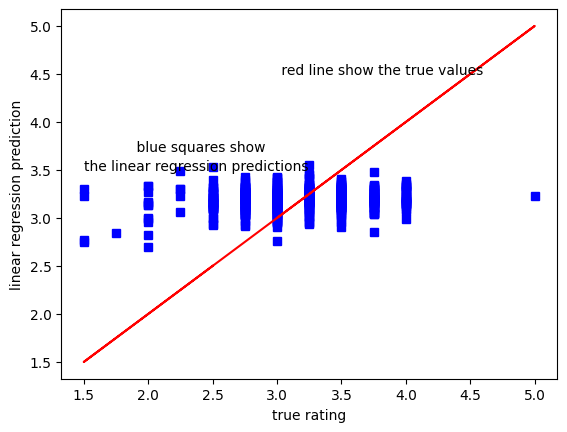

In [168]:
plt.plot(y2_test, y2_preds_lr, 'bs', y2_test, y2_test, 'r')
plt.xlabel('true rating')
plt.ylabel('linear regression prediction')
plt.text(3, 4.5, r' red line show the true values')
plt.text(1.5, 3.7, r'            blue squares show')
plt.text(1.5, 3.5, r'the linear regression predictions')